<a href="https://colab.research.google.com/github/Norwrongcl/ADA-Informes/blob/main/Select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Select
**Entrada**: Conjunto de $n$ números diferentes $A$ y un índice $i$.

**Salida**: Elemento $x\in A$, que es mayor a exactamente $i-1$ elementos de $A$, siendo el elemento $x$ el estadístico de orden $i$-ésimo para el conjunto $A$.

Saliendo del área de optimización, muchos algoritmos existen para ser utilizados en variabilidad, organización o análisis de datos, es decir, ** estadística**. Un concepto de esta disciplina es el llamado **estadístico de orden**, que corresponde al $k$-ésimo valor más pequeño de una muestra. Aunque por su característica pueda parecer como algo poco utilizado, la realidad es que estos valores son una herramienta fundamental dentro de la estadística no paramétrica o de inferencia, en donde los datos no están distribuidos bajo un criterio especificado. Así, el problema **select** está muy ligado a estos estadísticos, en donde manejamos la problemática de elegir el $i$-ésimo estadístico de orden en un conjunto de $n$ elementos.

![image](https://th.bing.com/th/id/R.c1d17268821753c6a0de55e58c05ae2c?rik=hYrWjF%2fJQn6sHQ&riu=http%3a%2f%2fdraytonvalley.ca%2fwp-content%2fuploads%2f2014%2f08%2fStatistical-Data.jpg&ehk=AfR3wlGUZ3uqsgJ8VSavP8GMi%2fmNaDpu4vxnKGWQnEg%3d&risl=&pid=ImgRaw&r=0)

#2. Select

##2.1 Código
A continuación, el siguiente código muestra la implementación del algoritmo.

In [ ]:
import random
from termcolor import cprint

comparisons = 0

def insertion_sort (array, verbose):
  if verbose == True: 
    cprint("Se ordena un arreglo!", 'yellow', attrs=['bold'])
    cprint(f"Arreglo a ordenar: {array}", 'green', attrs=['bold'])

  global comparisons

  for i in range (1, len(array)):
    if verbose == True: cprint(f"Pasada {i}", 'blue', attrs=['bold'])
    data = array[i]
    k = i-1
    if verbose == True:
      if array[k] < data: cprint("Elemento no movido\n", 'red', attrs=['bold'])
    while k >= 0 and array[k] > data:
      array[k+1] = array[k]
      k = k-1
      comparisons+=1
      if verbose == True: cprint(f"{array}\n", 'magenta', attrs=['bold'])
    array[k+1] = data
    if verbose == True: cprint(f"Al finalizar pasada: {array}\n", 'blue', attrs=['bold'])

  if verbose == True: 
    cprint(f"Arreglo ordenado: {array}", 'blue', attrs=['bold'])
    print("\n")

  return array


def encontrarMediana(A, verbose):
  A = insertion_sort(A, verbose)
  return (A[len(A) // 2])


def partition(A, p, r, x, verbose):
  if verbose == True:
    cprint("Se entra a función partition!", 'blue', attrs=['bold'])
  global comparisons
  

  for i in range(p, r):
    if (A[i] == x):
      A[r], A[i] = A[i], A[r]

      break

  if verbose == True:
    cprint(f"Arreglo a dividir: {A[p:r+1]}", 'blue', attrs=['bold'])
  pivot = A[r]
  if verbose == True:
    cprint(f"Pivote: [{A[r]}]", 'blue', attrs=['bold'])
  i = p
  for j in range(p,r):
    if A[j] <= pivot:
      if verbose == True:
        cprint(f"{A[j]} es menor a {pivot}", 'blue', attrs=['bold'])
      A[j], A[i] = A[i], A[j]
      i+=1
      if verbose == True:
        cprint(f"Arreglo luego del intercambio: {A[p:r+1]}", 'red', attrs=['bold'])

  A[i], A[r] = A[r], A[i]
  if verbose == True:
    cprint(f"Arreglo tras partition: {A[p:r+1]}", 'green', attrs=['bold'])
    print("\n")
  return i

def pivotSelection(A, l, r, verbose):
  fiveDivision = [A[i:i + 5] for i in range(0, len(A), 5)]                                               
  if verbose == True:
    cprint(f"Se divide el arreglo: {fiveDivision}", 'magenta', attrs=['bold'])
  medianas = [insertion_sort(sublista, verbose)[len(sublista)//2] for sublista in fiveDivision]
  if verbose == True:
    cprint(f"Se obtienen las medianas: {medianas}", 'cyan', attrs=['bold'])
  if len(medianas) <= 5:
    pivote = insertion_sort(medianas, verbose)[len(medianas)//2]
  else:
    pivote = pivotSelection(medianas, 0, len(medianas)//2, verbose)
  
  if verbose == True:
    cprint(f"La mediana de medianas (y nuestro pivote) es: [{pivote}]", 'red', attrs=['bold'])
    cprint(f"Ya tenemos nuestro pivote, por lo que procedemos a particionar el arreglo {A[l:r+1]}", 'yellow', attrs=['bold'])

  return partition(A, l, r, pivote, verbose)

def select(A, l, r, k, verbose):
  if (k > 0 and k <= r - l + 1):
    if verbose == True:
      cprint(f"Se busca pivote para el arreglo: {A[l:r+1]}", 'green', attrs=['bold'])
    q = pivotSelection(A, l, r, verbose)

    if (q - l ==  k - 1):
      if verbose == True: cprint(f"Encontramos el k-ésimo menor elemento! = {A[q]}", 'blue', attrs=['bold'])
      return A[q]
    
    if (q - l > k - 1):
      return select(A, l, q - 1, k, verbose)
    return select (A, q+1, r, k - q + l - 1, verbose)

#Ejemplo
def main(verbose=False):
  n = random.randint(6,10)
  array = random.sample(range(1,100),n)
  k = random.randint(1,n)
  cprint(f"Arreglo de entrada: {array}", 'yellow', attrs=['bold'])
  cprint(f"k = {k}", 'yellow')
  element = select(array, 0, len(array)-1, k, verbose)
  cprint(f"k-ésimo menor elemento del arreglo: {element}", 'green', attrs=['bold'])
  cprint(f"Número de comparaciones: {comparisons}", 'blue', attrs=['bold'])

main(False)

Arreglo de entrada: [80, 28, 90, 72, 54, 27, 30, 15, 76, 56]
k = 3
k-ésimo menor elemento del arreglo: 28
Número de comparaciones: 23


##2.2 Descripción del algoritmo
El algoritmo **Select** es recursivo, llamándose a sí mismo un total de dos veces por cada recursion. Éste recibe un arreglo o lista de $n$ elementos, su posición inicial, su posición final y un valor $k$, con el cual buscaremos el $k$-ésimo menor elemento dentro de la lista. A diferencia de **R-Select**, **Select** elige su pivote con ayuda de la función **pivotSelection**. En términos generales, la implementación de este algoritmo aplica la siguiente rutina gracias al algoritmo recién mencionado:
1. Al entrar a **pivotSelection**, el arreglo original de $n$ elementos se divide en $n/5$ grupos de 5 elementos cada uno, quedando el último grupo con menos elementos.
2. Luego, se encuentra la mediana de cada subarreglo, ordenándose con **InsertionSort**.
3. Se aplica de forma recursiva **pivotSelection** con tal de encontrar la mediana de medianas ($m$) de las $n/5$ medianas identificadas anteriormente.
4. Así definimos a $m$ como el pivote para ser utilizado en la función **Partition**.
5. Finalmente, se aplicará recursivamente **Select** con el subarreglo izquierdo o derecho, sea cual sea el correspondiente para buscar el $k$-ésimo menor elemento.

Para ver paso a paso lo que sucede en el algoritmo, `verbose` debe ser igual a `True`.

##2.3 Ejemplo
Para mostrar cómo funciona el algoritmo, trabajaremos con el siguiente arreglo. Estaremos buscando el menor elemento, es decir, $k = 1$.

$A = [12, 3, 2, 9, 17, 0, 21, 7, 5, 4, 8, 11, 6, 15, 1]$

Comenzaremos buscando la mejor partición con la cual trabajar, por lo que primero dividimos el arreglo en $n/5$,es decir que nos quedaran 3 subarreglos de 5 elementos cada uno, en este caso específico, considera 15 elementos, por lo que no habría ningún subarreglo menor a 5.

$[12, 3, 2, 9, 17]$ - $[0, 21, 7, 5, 4]$ - $[8, 11, 6, 15, 1]$

A continuación, ordenamos cada uno utilizando Insertion Sort, lo cual nos dejaría con los subarreglos de la siguiente forma.

$[2, 3, 9, 12, 17]$ - $[0, 4, 5, 7, 21]$ - $[1, 6, 8, 11, 15]$

Al tener estos, ahora obtenemos la mediana de cada uno, y las guardamos en el siguiente arreglo.

$M = [9, 5, 8]$

A continuación, aplicamos recursivamente **pivotSelection** con tal de encontrar la mediana de las medianas, contenida en el arreglo $M$. Por lo tanto, se ordena éste y buscamos su mediana.

$M = [5, 8, 9]$

Así, obtenemos a $8$ como nuestro pivote para particionar el arreglo $A$, que luego de haberse aplicado la función **Partition** se vería de la siguiente forma:

$A = [3, 2, 0, 7, 5, 4, 6, 1, 8, 12, 9, 17, 21, 8, 11, 15]$

Ahora bien, como estamos buscando el menor elemento trabajaremos con el subarreglo de la izquierda, es decir:

$L = [3, 2, 0, 7, 5, 4, 6, 1]$

Y puesto que este es un algoritmo recursivo, ahora aplicaremos nuevamente el procedimiento, pero ahora sobre el arreglo $L$. Así que, lo dividimos en subarreglos de $5$ elementos cada uno, pero como ahora la cantidad de elementos no es múltiplo de este número, tendremos un subarreglo con tan solo tres elementos.

$[3, 2, 0, 7, 5]$ - $[4, 6, 1]$

Ordenamos estos subarreglos, y buscamos sus medianas.

$[0, 2, 3, 5, 7]$ - $[1, 4, 6]$

$M = [3, 4]$

Aplicamos **pivotSelection** en $M$, y encontramos que nuestra mediana de medianas es $3$, por lo que este será nuestro pivote para particionar el arreglo $L$.

$L = [2, 0, 1, 3, 5, 4, 7, 6]$

Nuevamente avanzamos solo con el subarreglo izquierdo, que contiene los valores menores a $3$.

$L = [2, 0, 1]$

Debido a que es un arreglo menor a $5$, tan solo debemos ordenarlo y obtener su mediana, quedando en lo siguiente.

$L = [0, 1, 2]$

La mediana es $1$, por lo que dividimos el arreglo nuevamente en otros dos subarreglos.

$[0]$ - $[1, 2]$

Finalmente, como estábamos buscando el menor elemento de todo el arreglo, concluimos en que éste es $0$.

##2.4 Ejecución del algoritmo paso a paso (`verbose = True`)
Al determinar que `verbose` sea igual a `True` en todas las funciones, al ejecutar el programa mostrarán cómo se realiza todo paso a paso, tal como se ve a continuación:

In [ ]:
main(True)

Arreglo de entrada: [20, 74, 69, 25, 1, 81, 43, 76, 62, 64]
k = 7
Se busca pivote para el arreglo: [20, 74, 69, 25, 1, 81, 43, 76, 62, 64]
Se divide el arreglo: [[20, 74, 69, 25, 1], [81, 43, 76, 62, 64]]
Se ordena un arreglo!
Arreglo a ordenar: [20, 74, 69, 25, 1]
Pasada 1
Elemento no movido

Al finalizar pasada: [20, 74, 69, 25, 1]

Pasada 2
[20, 74, 74, 25, 1]

Al finalizar pasada: [20, 69, 74, 25, 1]

Pasada 3
[20, 69, 74, 74, 1]

[20, 69, 69, 74, 1]

Al finalizar pasada: [20, 25, 69, 74, 1]

Pasada 4
[20, 25, 69, 74, 74]

[20, 25, 69, 69, 74]

[20, 25, 25, 69, 74]

[20, 20, 25, 69, 74]

Al finalizar pasada: [1, 20, 25, 69, 74]

Arreglo ordenado: [1, 20, 25, 69, 74]


Se ordena un arreglo!
Arreglo a ordenar: [81, 43, 76, 62, 64]
Pasada 1
[81, 81, 76, 62, 64]

Al finalizar pasada: [43, 81, 76, 62, 64]

Pasada 2
[43, 81, 81, 62, 64]

Al finalizar pasada: [43, 76, 81, 62, 64]

Pasada 3
[43, 76, 81, 81, 64]

[43, 76, 76, 81, 64]

Al finalizar pasada: [43, 62, 76, 81, 64]

Pasada 4
[43,

#3. Correctitud

##3.1 Teorema (correctitud de la función Select)
*El algoritmo **Select** recibe un arreglo: $[a_1,a_2,a_3,...,a_n]$ y retorna su $k$-ésimo menor elemento.*

###Prueba del teorema
Puesto que nuevamente estamos analizando un algoritmo **recursivo**, **Select** verá su teorema puesto a prueba por medio la inducción matemática, en donde consideraremos una hipótesis $P(n)$. Cabe notar que tan solo se comprueba la correctitud de Select debido a que, aunque **Pivot Selection** es una nueva función, en el fondo tan solo reutiliza algoritmos que ya sabemos son correctos, como Partition e Insertion Sort.

**Hipótesis:** Select retorna el $k$-ésimo menor elemento de una secuencia de $n$ elementos.

**Caso base ($n = 1$)**: Puesto que la cantidad de elementos es igual a $1$, el pivote será este valor, y $k$ no puede ser mayor a $n$. Así, Select retorna este elemento, por lo que $P(1)$ se cumple.

**Paso inductivo ($m < n$):** Luego de haber comprobado que el caso base ($P(1)$) sí se cumple, procedemos a verificar aquellos casos donde se divide el problema. Al momento de obtener nuestro pivote, nuestro arreglo se particiona en dos subarreglos $[0,...,q-1]$ y $[q+1,...,n]$, siendo $q$ a su vez el posible $k$-ésimo menor elemento que buscamos.

Puesto que sabemos que el tamaño de todos los subarreglos serán **siempre menores a $n$**, gracias a la inducción matemática afirmamos que éstos contendrán los elementos menores y mayores al pivote encontrado respectivamente, cada cual pudiendo contener el elemento que estamos buscando.

En conclusión, y luego de verificar que ambos casos se cumplen en nuestra hipótesis, podemos decir que **Select** es correcto.

![imagen](https://i.imgur.com/unwF3s9.png)

#4. Tiempo de ejecución

##4.1 Teorema
El algoritmo **Select** tiene un tiempo de ejecución de $O(n)$ en el peor caso.

##4.2 Prueba del teorema
Para analizar si este teorema es efectivamente correcto, consideraremos al peor caso como aquel donde nuestro pivote se acerca demasiado ya sea al comienzo de nuestro arreglo, como al final de éste. Para encontrar nuestra ecuación bajo la cual trabajar. Por un lado, podemos considerar el costo de **Insertion Sort**, que al ser en arreglos de $5$ elementos o menos tiene un tiempo de ejecución $O(n)$, y por otro lado el encontrar la mediana de medianas posee un tiempo estimado de $T(\frac{n}{5})$.

Sin embargo, ¿sobre cuántos elementos estaremos trabajando en cada paso? Si consideramos a $M$ como la lista donde se contienen las medianas de cada sublista, dentro de ella la mitad de sus elementos son menores a la **mediana de medianas**, es decir, $\frac{n}{10}$ elementos. En cada uno de estos, existen dos elementos que son menores a la mediana de medianas. Por lo tanto, son $\frac{3n}{10}$ los menores, y en el peor caso, nuestro algoritmo deberá entonces trabajar con $\frac{7n}{10}$ de ellos.

Por lo tanto, nuestra **ecuación de recurrencia** para el algoritmo Select en el peor caso es de:

> $T(n)= O(n) + T\left(\frac{n}{5}\right)+T\left(\frac{7n}{10}\right)$

Luego, para resolver esta ecuación, utilizaremos el método de **inducción**, el cual se desarrolla de la siguiente forma:

![imagen](https://i.imgur.com/NMRTUX8.png)

Por lo tanto, y gracias a este desarrollo matemático-inductivo, podemos concluir que, efectivamente, el tiempo de ejecución en el peor caso de **Select** es **$O(n)$**.

#5. Experimentos

##5.1 Número de comparaciones
A continuación, ahora considerando el algoritmo **Select**, compararemos gráficamente entre:

*   cantidad de comparaciones del peor caso calculadas matemáticamente ($O(n)$),
*   cantidad de comparaciones en el mejor caso ($\theta(n)$)
*   y la cantidad de comparaciones entre entradas ordenadas aleatoriamente.

Esto para arreglos de tamaño $n$ entre 5 y 99. Los arreglos aleatorios serán llenados con números entre 1 y 100. 

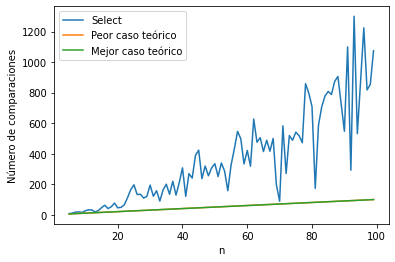

In [ ]:
import matplotlib.pyplot as plt
import math
import random

x = [n for n in range(5,100)]
y1 = [n for n in range(5,100)] #Peor caso
y2 = [n for n in range(5,100)] #Mejor caso
y = []

for n in range(5, 100):
  comparisons = 0
  array = random.sample(range(1,100), n)
  k = random.randint(1,n)
  elemento = select(array, 0, len(array)-1, k, verbose = False)
  y.append(comparisons)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Select","Peor caso teórico","Mejor caso teórico"])

plt.xlabel("n")
plt.ylabel("Número de comparaciones")
plt.show()

###Análisis de resultados
De forma inusual, podemos observar como en nuestro gráfico el algoritmo estudiado se comporta de forma muy inestable, aunque manteniendo una cierta linealidad al momento de aumentar el número de comparaciones, acercándose en ciertos momentos a la representación de tanto su peor como mejor caso teórico. Aunque el algoritmo funciona y se sabe que fue implementado de forma correcta, esta inestabilidad se puede deber a diferentes factores, como la aleatoridad de los números, el uso de **Insertion Sort** como algoritmo de ordenamiento o una recursividad muy extensa dentro de la función **Pivot Selection**, debido a la constante llamada a **Partition** que ya de por sí tiene otro costo.


##5.2 Comparación del tiempo de ejecución entre Select y R-Select
En este experimento, se evaluarán y compararán los tiempos de ejecución de nuestro algoritmo estudiado y **Randomized Select**, el cual funciona de manera similar, pero con el uso de un pivote aleatorio. A comparación de Select, R-Select posee un peor caso teórico $O(n^2)$.

In [ ]:
def partition_end(A, p, r):
  pivot = A[r]
  i = p 
  for j in range(p,r): 
    if A[j] <= pivot:
      A[j], A[i] = A[i], A[j] 
      i+=1
  A[i], A[r] = A[r], A[i]
  return i

def randomizedPartition(A, p, r):
  i = random.randint(p,r)
  A[r], A[i] = A[i], A[r]
  return partition_end(A, p, r)

def randomizedSelect(A, p, r, k):
  if p == r:
    return A[p]
  q = randomizedPartition(A, p, r)
  i = q - p + 1
  if (i == k):
    return A[q]
  elif k < i:
    return randomizedSelect(A, p, r-1, k)
  else:
    return randomizedSelect(A, q+1, r, k-i)

In [ ]:
import random
import datetime
from timeit import repeat

x1 = []; y1 = []; y2 = []
verbose = False

for n in range(5, 500):
  array = random.sample(range(1,1000), n)
  k = random.randint(1,n)

  r = repeat(setup="from __main__ import select", stmt = f"select({array},{0},{len(array)-1},{k},{verbose})", repeat = 1, number = 10)
  y1.append(r)
  t = repeat(setup="from __main__ import randomizedSelect", stmt = f"randomizedSelect({array},{0},{len(array)-1},{k})", repeat = 1, number = 10)
  y2.append(t)

  x1.append(n)

plt.plot(x1,y1)
plt.plot(x1,y2)
plt.legend(["Select","R-Select"])

plt.xlabel("n")
plt.ylabel("Tiempo en ms")
plt.show()

###Análisis de resultados
Como se puede observar en el gráfico, en un comienzo R-Select resulta ser más eficiente que nuestro algoritmo estudiado, ejecutándose en una menor cantidad de tiempo. Sin embargo, mientras la cantidad de elementos va aumentando es posible notar cómo R-Select termina siendo similar a Select, pero aún más inestable. Esto se puede deber principalmente a la selección del pivote, el cual, como es aleatorio, puede resultar en una ejecución un tanto más "inesperada", o en otras palabras, Partition podría trabajar desde su mejor caso hasta el peor. También cabe recalcar que otra causa para estos *peaks* es la inestabilidad del hardware sobre el que se ejecuta el programa.